<a href="https://colab.research.google.com/github/Ishank2301/Comprehensive-ML-Handbook/blob/main/Glorot_Initialization_Normal_Uniform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries:

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import seaborn as sns

# Create a valid Dataset:

In [2]:
X, y = make_moons(n_samples=100, noise=0.1, random_state=1)

In [3]:
X.shape

(100, 2)

<Axes: >

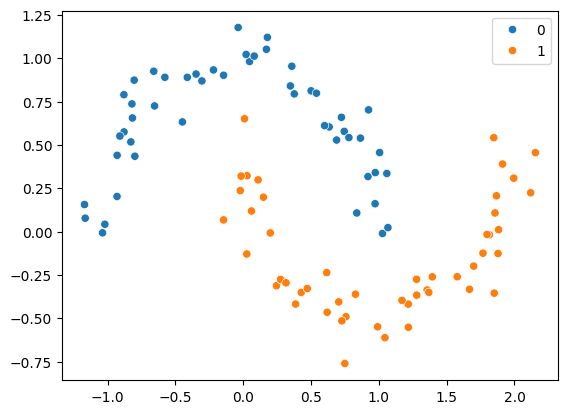

In [4]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

# Create a ANN Model:

# For activation function "Relu":

In [5]:
model = Sequential()

model.add(Dense(10, input_dim=2, activation='tanh',kernel_initializer='glorot_normal'))
model.add(Dense(10,  activation='tanh',kernel_initializer='glorot_normal'))
model.add(Dense(10,  activation='tanh',kernel_initializer='glorot_normal'))
model.add(Dense(10,  activation='tanh',kernel_initializer='glorot_normal'))
model.add(Dense(10,  activation='tanh',kernel_initializer='glorot_normal'))
model.add(Dense(10,  activation='tanh',kernel_initializer='glorot_normal'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591 (2.31 KB)

 Trainable params: 591 (2.31 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True
)

In [9]:
# Initializng the Model on X,y and validation split of an 20%.
history = model.fit(X, y, validation_split=0.2, epochs=3500, batch_size=100,verbose=1,callbacks=callback)

Epoch 1/3500
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.2500 - loss: 0.7789 - val_accuracy: 0.5500 - val_loss: 0.6818
Epoch 2/3500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.2500 - loss: 0.7681 - val_accuracy: 0.5500 - val_loss: 0.6786
Epoch 3/3500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 0.2625 - loss: 0.7574 - val_accuracy: 0.5500 - val_loss: 0.6757
Epoch 4/3500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - accuracy: 0.3125 - loss: 0.7468 - val_accuracy: 0.6000 - val_loss: 0.6730
Epoch 5/3500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - accuracy: 0.3750 - loss: 0.7364 - val_accuracy: 0.6500 - val_loss: 0.6706
Epoch 6/3500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.4125 - loss: 0.7263 - val_accuracy: 0.6500 - val_loss: 0.6683
Epoch 7/3500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - accuracy: 0.5000 - loss: 0.7164 - val_accuracy: 0.7500 - val_loss: 0.6663
Epoch 8/3500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.5125 - loss: 0.7067 - val_accuracy: 0.850

In [10]:
model.get_weights()

[array([[-0.0678445 ,  0.08836896, -0.35258347, -0.40757045, -0.08169726,
          0.82577676,  0.44412962, -0.43003175,  0.17542434,  0.7100618 ],
        [ 0.59138274,  0.33452618,  0.5138183 ,  0.25755584, -0.36993602,
         -0.16137102,  0.21975653,  0.23920718,  0.3035799 ,  0.8993392 ]],
       dtype=float32),
 array([-0.04181425,  0.06090577, -0.06419616, -0.09455788, -0.01654521,
         0.07910085, -0.04789852, -0.04270103, -0.06110291,  0.05983734],
       dtype=float32),
 array([[ 0.05005479, -0.40893418,  0.14875707,  0.30278966,  0.03789617,
          0.28458753,  0.05010273, -0.13125178,  0.26440945,  0.46842894],
        [-0.5315265 ,  0.54751736, -0.5599903 , -0.4115794 ,  0.31258306,
         -0.24756326, -0.00458468,  0.02271954,  0.15940328,  0.43512475],
        [ 0.66446096, -0.43888065,  0.05564889, -0.04080143, -0.07887397,
          0.11936325,  0.64472073,  0.59087545, -0.38774467,  0.75462687],
        [ 0.2711306 ,  0.22434811,  0.22038192, -0.46642873, 

# Observing the model Data:

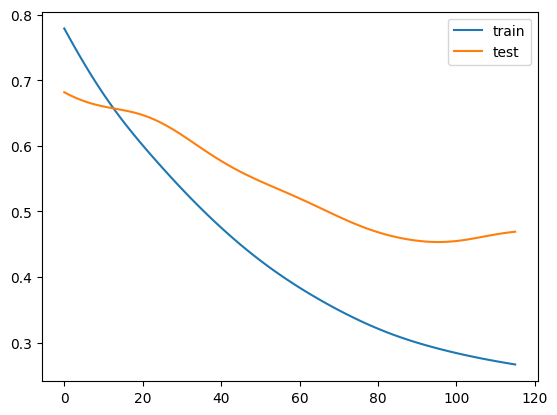

In [11]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


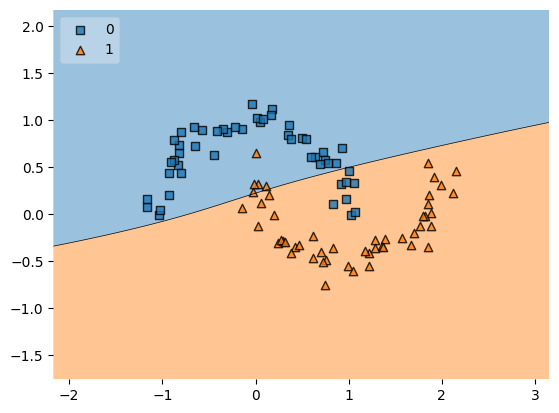

In [12]:
plot_decision_regions(X, y.ravel(), clf = model, legend=2)
plt.show()

As we can see our model has converged faster using the he_normal initializer and the desicion boundary is also not overtrained.

# For activation function "Tanh or Sigmoid":


In [13]:
model = Sequential()

model.add(Dense(10, input_dim=2, activation='tanh',kernel_initializer='glorot_uniform'))
model.add(Dense(10,  activation='tanh',kernel_initializer='glorot_uniform'))
model.add(Dense(10,  activation='tanh',kernel_initializer='glorot_uniform'))
model.add(Dense(10,  activation='tanh',kernel_initializer='glorot_uniform'))
model.add(Dense(10,  activation='tanh',kernel_initializer='glorot_uniform'))
model.add(Dense(10,  activation='tanh',kernel_initializer='glorot_uniform'))
model.add(Dense(1, activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591 (2.31 KB)

 Trainable params: 591 (2.31 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])

In [16]:
history = model.fit(X,y,validation_split=0.2,epochs=300,callbacks=callback,batch_size=100,verbose=0)

Epoch 99: early stopping
Restoring model weights from the end of the best epoch: 79.


# Observing our models result:

In [17]:
model.get_weights()

[array([[ 0.23626335,  0.56524736,  0.04573837,  0.08093999,  0.5031442 ,
          0.65716225, -0.339423  ,  0.10523482,  0.41532117,  0.48139727],
        [-0.00265596, -0.38867387,  0.6302004 , -0.06129724, -0.4051844 ,
          0.27682158, -0.51854604, -0.5322232 , -0.21369757,  0.3696884 ]],
       dtype=float32),
 array([-0.04699381,  0.0625184 , -0.07995839, -0.03724606, -0.03213223,
         0.06055741,  0.09469815,  0.06143009,  0.08236941,  0.07327566],
       dtype=float32),
 array([[ 0.42911604,  0.38293368, -0.21469924, -0.26317832, -0.18055378,
         -0.04876157, -0.42730412, -0.00557926,  0.44646645,  0.09918077],
        [-0.40711418, -0.4651026 , -0.4611749 , -0.5500846 ,  0.0069884 ,
         -0.5206284 , -0.50872004,  0.09940153, -0.27299523,  0.38648027],
        [ 0.05167969, -0.09753677, -0.04467044,  0.0551201 , -0.24865189,
          0.02120579,  0.17163453,  0.48695177, -0.05303989,  0.21316965],
        [ 0.13836959,  0.34211183,  0.39806384,  0.10187837, 

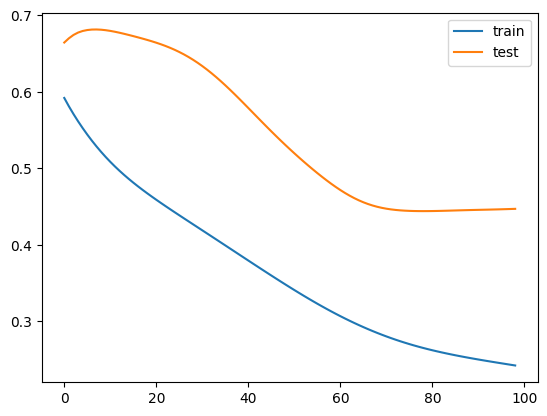

In [18]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


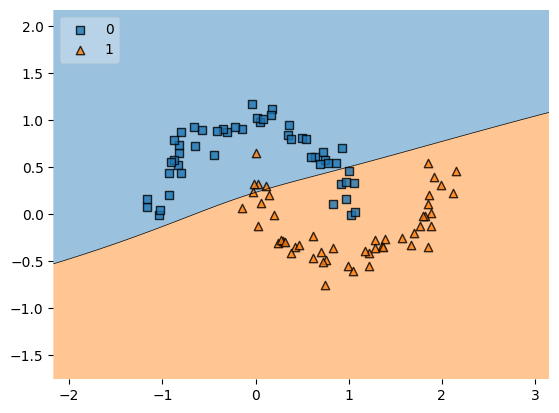

In [19]:
plot_decision_regions(X, y.ravel(), clf = model, legend=2)
plt.show()

I think uniform is more Good
